In [11]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Dict, List, Any, Optional
from langchain_core.messages import HumanMessage,SystemMessage,AIMessage
import json
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os
load_dotenv()
llm_key = os.getenv('llm_key')

In [12]:
model=ChatOpenAI(model="openai/gpt-oss-20b:free",
                        api_key=llm_key,
                        base_url="https://openrouter.ai/api/v1")

In [13]:
class GraphState(TypedDict):
    q:str
    customerid : str
    conv : Dict[str, Any]

In [18]:
def model_call(state: GraphState):
    system_prompt = SystemMessage(content="You are a helpful chatbot.")
    response = model.invoke([system_prompt] + state["q"])
    return {
        "conv": state["conv"] + [response]
    }

In [19]:
graph = StateGraph(GraphState)
graph.add_node('llm',model_call)
graph.set_entry_point('llm')
graph.add_edge("llm",END)

app = graph.compile() 

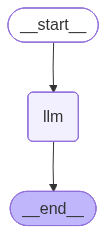

In [20]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
state = {
    "q": [HumanMessage(content="Hello, who are you?")],
    "customerid": "123",
    "conv": []
}

result = app.invoke(state)

for msg in result["conv"]:
    print(f"{msg.type.upper()}: {msg.content}")

AI: Hello! I’m ChatGPT, a conversational AI developed by OpenAI. I’m here to help answer questions, offer explanations, brainstorm ideas, or just chat about whatever’s on your mind. How can I assist you today?
